## Introduction:

The goal of this tutorial is to go over set of variales ..
applying logistic regression to decide what creates better customer engagement .. 

Link to the tutorial >> https://towardsdatascience.com/marketing-analytics-customer-eda-regression-482e3191549a

Link to the Dataset >>  https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data

## 1. set of imports:

In [71]:
#Load up packages and data
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from scipy import stats

## 2. Loading the dataset:

In [2]:
mdata = pd.read_csv('CEV_dataset.csv')

In [3]:
mdata.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
mdata.shape

(9134, 24)

In [6]:
mdata.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

the dataset contains 24 columns ..

all of them are indepedent variables except (response) that represents our target/dependent variable that indicates whether the customer is engaged or not .. 

We have to convert this respose variable to numeric one .. to be able to apply logistic regression .. 

In [11]:
mdata['Engaged'] = mdata['Response'].apply(lambda x: 0 if x == 'No' else 1)

In [12]:
mdata.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


Now, let's measure the engagement rate of the customers to the marketing campaign 

In [42]:
engagement_rate_mdata = pd.DataFrame(mdata.groupby('Engaged').count()['Response']/mdata.shape[0] * 100.0)

In [43]:
engagement_rate_mdata

,Response
Engaged,
0,85.679877
1,14.320123


Let's analyze the behaviour of non-engaged customers .. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002343F9467F0>],
      dtype=object)

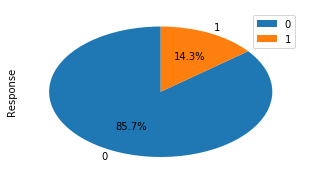

In [49]:
engagement_rate_mdata.plot(kind='pie',figsize=(5, 3),startangle=90,
    subplots=True,autopct=lambda x: '%0.1f%%' % x)

Let's explore the claim amounts .. 

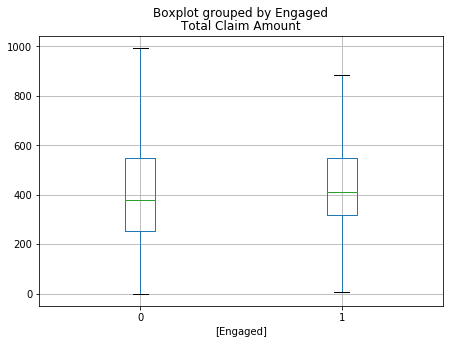

In [50]:
mdata[['Engaged', 'Total Claim Amount']].boxplot(by = 'Engaged',showfliers=False,figsize=(7,5))

The spread of the non-engaged customers is a bit higher .. 

"showfliers=False" allows to exclude the outliers to be able to perfectly visualize the boxplot itself

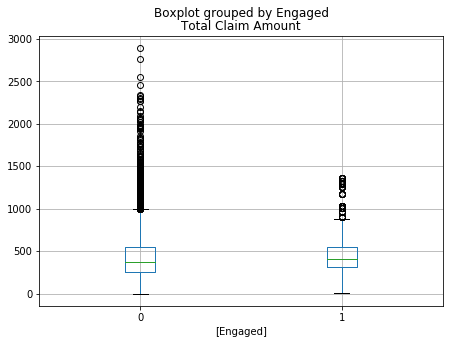

In [51]:
mdata[['Engaged', 'Total Claim Amount']].boxplot(by = 'Engaged',showfliers=True,figsize=(7,5))

as expected .. !

a lot of outliers are there in the non-engaged customers .. 

## Logistic Regression:

Let's examine the feasture variables to check which ones best fit the logistic regression model .. 

In [52]:
mdata.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Engaged         

mmm we have to convert the variables of datatype (object) to numeric .. to be able to use them as inputs within the LR model

In [53]:
continuous_vars = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

In [54]:
gender_values, gender_labels = mdata['Gender'].factorize() ## this function will convert factor to numeric

In [56]:
gender_values, gender_labels

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['F', 'M'], dtype='object'))

mmm but what if the oder of the category matters .. 

hence, we can't use this factorize function with all the variables .. 

But we gonna use (categorical()) instead .. 

In [57]:
categories = pd.Categorical(mdata['Education'], categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'])

In [58]:
categories

[Bachelor, Bachelor, Bachelor, Bachelor, Bachelor, ..., Bachelor, College, Bachelor, College, College]
Length: 9134
Categories (5, object): [High School or Below, Bachelor, College, Master, Doctor]

Now, let's store these variables in the dataframe .. 

In [59]:
mdata['GenderFactorized'] = gender_values
mdata['GenderFactorized'].head()

0    0
1    0
2    0
3    1
4    1
Name: GenderFactorized, dtype: int64

In [60]:
mdata['EducationFactorized'] = categories.codes

In [61]:
mdata['EducationFactorized'].head()

0    1
1    1
2    1
3    1
4    1
Name: EducationFactorized, dtype: int8

Now, let's build the LR model .. 

In [63]:
logit = sm.Logit(mdata['Engaged'], 
    mdata[['Customer Lifetime Value','Income','Monthly Premium Auto',
        'Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints',
        'Number of Policies','Total Claim Amount','GenderFactorized','EducationFactorized']])

In [64]:
logit

In [69]:
logit_fit = logit.fit()
logit_fit

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [80]:
logit_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                   Logit                Pseudo R-squared:     -0.025   
Dependent Variable:      Engaged              AIC:                  7707.3536
Date:                    2020-07-04 23:35     BIC:                  7778.5512
No. Observations:        9134                 Log-Likelihood:       -3843.7  
Df Model:                9                    LL-Null:              -3751.6  
Df Residuals:            9124                 LLR p-value:          1.0000   
Converged:               1.0000               Scale:                1.0000   
No. Iterations:          6.0000                                              
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
Customer Lifetime Value       -0.0000   0.0000 -1.3727 0.1698 -0.0000  0.0000
Income                        -0.0000   0.0000 -2.4944 0.0126 -0.0000 -0.0000
Monthly Premium Auto          -0.0081   0.0012 -6.5261 0.0000 -0.0106 -0.0057
Months Since Last Claim       -0.0194   0.0028 -6.8583 0.0000 -0.0249 -0.0138
Months Since Policy Inception -0.0057   0.0010 -5.8265 0.0000 -0.0076 -0.0038
Number of Open Complaints     -0.0813   0.0342 -2.3761 0.0175 -0.1484 -0.0142
Number of Policies            -0.0781   0.0128 -6.1139 0.0000 -0.1032 -0.0531
Total Claim Amount             0.0001   0.0002  0.9429 0.3457 -0.0002  0.0005
GenderFactorized              -0.1500   0.0579 -2.5920 0.0095 -0.2634 -0.0366
EducationFactorized           -0.0070   0.0267 -0.2636 0.7921 -0.0594  0.0453
=============================================================================

"""

mmm it seems that almost all the variables correlate negatively with the enegagement variable .. i.e. the more of each variable ..
the less engagement the customer is .. 

except (Total claim amount) as the more values the customer will claim .. the more enagegement he will have!.. 

Next step ..

is to apply other (more advanced) machine learning .. or even stacking them in light of the below tutorial 

https://towardsdatascience.com/machine-learning-pipelines-nonlinear-model-stacking-668f2b720344